# **CP462 Project : 18**

# หัวข้อ : **Diabetes of female patients**

**สมาชิก:**
<br>1) นายกฤตณัฐ ขจรกุลญาณี (ID: 65102010190)
<br>2) นายบูรพา ยืนยง (ID : 65102010418)
<br><br>
**Dataset:** Diabetes Patients Data <br>
**Source:** https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset?resource=download

## **Import Packages**

## **Import Dataset**

In [ ]:
import numpy as np  # module for the array
import pandas as pd # module using with data or data analysis
import seaborn as sns # module for plotting graph with x and y table
import matplotlib.pyplot as plt # module for plotting graph with more useful option
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
df = pd.read_csv("diabetes.csv")

## **Data Cleaning**

In [ ]:
df.info(10) # Show Column Heads

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No null value

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


But some of value that are not meant to be 0 but have  0 value in some row



In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Column like


*   Gluecose
*   Blood Pressure
*   SkinThickness
*   Insulin
*   BMI

Have zero value<br>
That's is NULL value

In [ ]:
(df==0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


Multiple ways of data cleaning Method to choose and Compare

In [ ]:
df_dropZero = df[(df['Glucose'] != 0) & (df['BloodPressure'] != 0) & (df['SkinThickness'] != 0) & (df['Insulin'] != 0) & (df['BMI'] != 0)]

In [ ]:
df_fillMean = df
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
  df_fillMean[col] = df_fillMean[col].replace(0, np.nan) # Replace 0 with NaN
  mean_value = df_fillMean[col].mean() # Calculate mean without 0
  df_fillMean[col] = df_fillMean[col].fillna(mean_value) # Fill NaN with mean

In [ ]:
df_fillMedian = df
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
       df_fillMedian[col] = df_fillMedian[col].replace(0, np.nan)
       median_value = df_fillMedian[col].median()
       df_fillMedian[col] = df_fillMedian[col].fillna(median_value)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 2) # You can adjust the number of neighbors
df_filled = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [ ]:
# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [ ]:
# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_dropZero_no_outliers = df_dropZero[~((df_dropZero < lower_bound) | (df_dropZero > upper_bound)).any(axis=1)]

In [ ]:
# Calculate the IQR for each column
Q1 = df_fillMean.quantile(0.25)
Q3 = df_fillMean.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_mean_no_outliers = df_fillMean[~((df_fillMean < lower_bound) | (df_fillMean > upper_bound)).any(axis=1)]

Choose Method

In [ ]:
df = df_dropZero_no_outliers  # Choose Method

## **Explore Data Analysis**

In [ ]:
import warnings

# ปิดการแจ้งเตือน Warning
warnings.filterwarnings("ignore", category=FutureWarning)

### Pregnancies

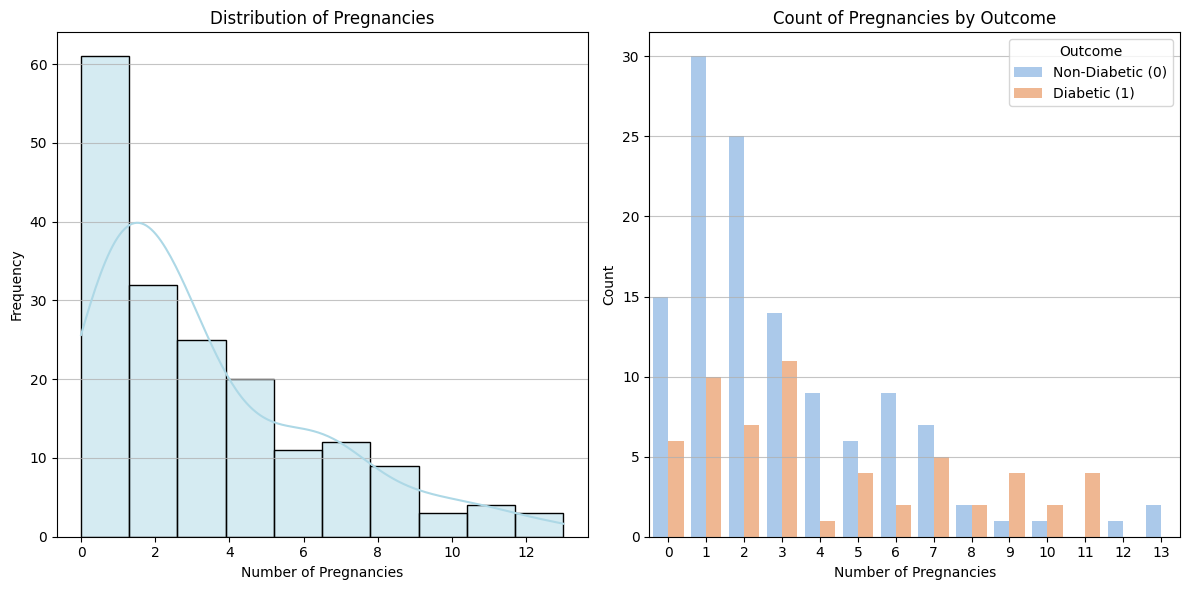

In [ ]:
# สร้าง Histogram สำหรับ Pregnancies
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)  # แบ่งหน้าจอเป็น 1 แถว 2 คอลัมน์
sns.histplot(df['Pregnancies'], bins=10, kde=True, color='lightblue')
plt.title('Distribution of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Bar Plot สำหรับ Pregnancies กับ Outcome
plt.subplot(1, 2, 2)  # แบ่งหน้าจอเป็น 1 แถว 2 คอลัมน์
sns.countplot(x='Pregnancies', hue='Outcome', data=df, palette='pastel')
plt.title('Count of Pregnancies by Outcome')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Non-Diabetic (0)', 'Diabetic (1)'])
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()  # ปรับระยะห่างระหว่างกราฟให้พอดี
plt.show()

### Gluecose

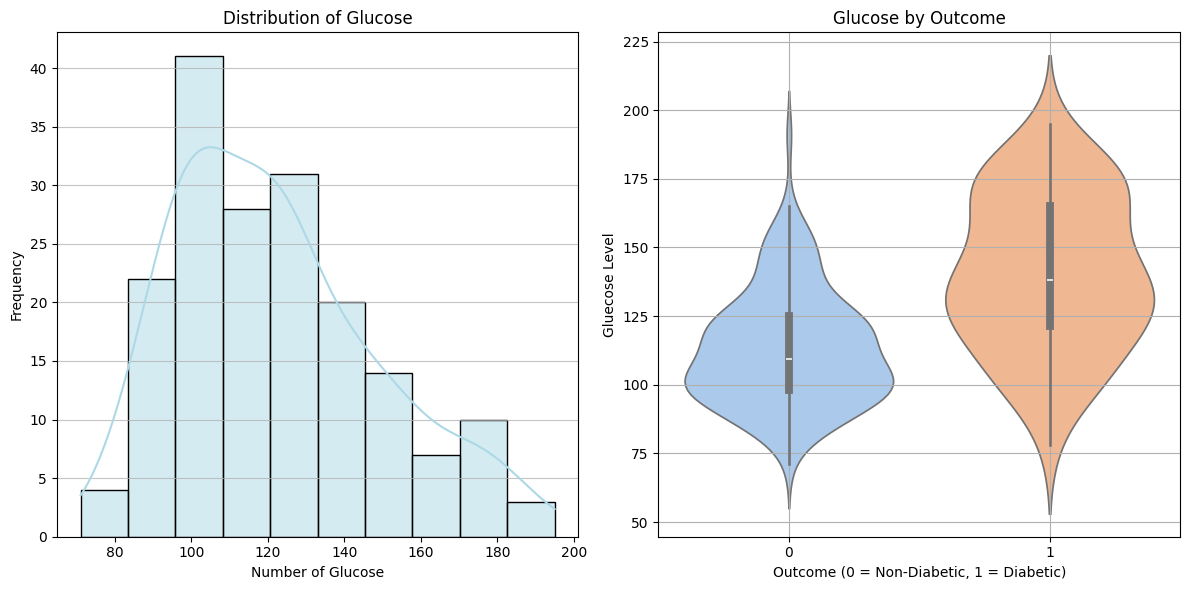

In [ ]:
plt.figure(figsize=(12, 6))

x = df[df['Outcome'] == 0]['Glucose']
y = df[df['Outcome'] == 1]['Glucose']

plt.subplot(1, 2, 1)  # แบ่งหน้าจอเป็น 1 แถว 2 คอลัมน์
sns.histplot(df['Glucose'], bins=10, kde=True, color='lightblue')
plt.title('Distribution of Glucose')
plt.xlabel('Number of Glucose')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.subplot(1, 2, 2)  # แบ่งหน้าจอเป็น 1 แถว 2 คอลัมน์
sns.violinplot(x='Outcome', y='Glucose', data=df, palette='pastel')
plt.title('Glucose by Outcome')
plt.xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Gluecose Level')
plt.grid()

plt.tight_layout()  # ปรับระยะห่างระหว่างกราฟให้พอดี
plt.show()

### BloodPressure

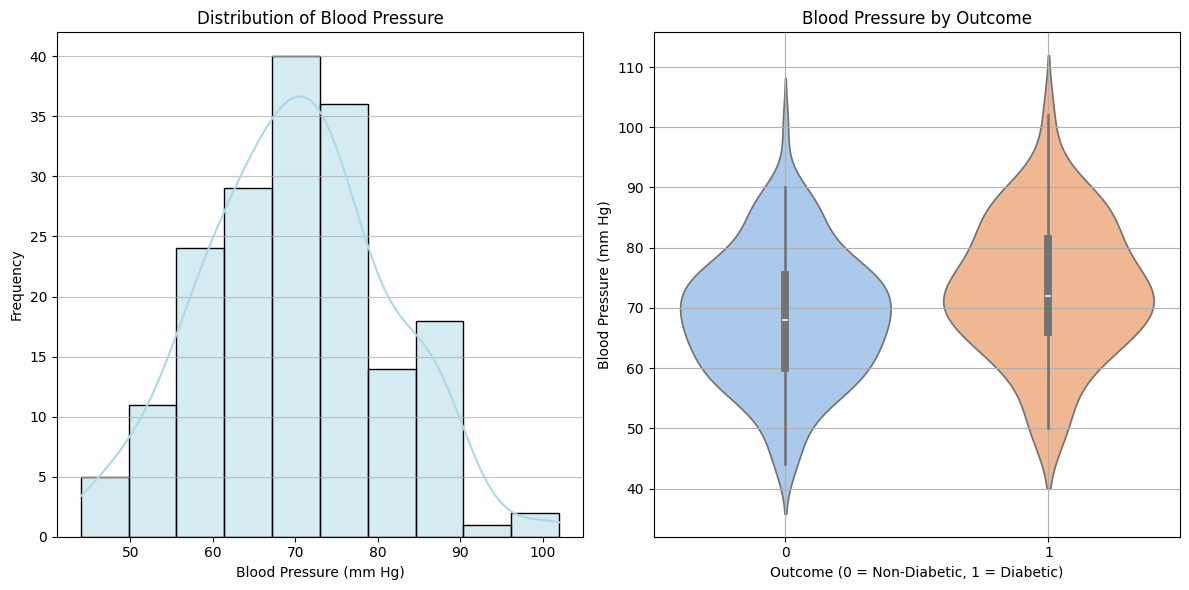

In [ ]:
# สร้าง Histogram สำหรับ BloodPressure
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)  # แบ่งหน้าจอเป็น 1 แถว 2 คอลัมน์
sns.histplot(df['BloodPressure'], bins=10, kde=True, color='lightblue')
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Violin Plot สำหรับ BloodPressure กับ Outcome
plt.subplot(1, 2, 2)  # แบ่งหน้าจอเป็น 1 แถว 2 คอลัมน์
sns.violinplot(x='Outcome', y='BloodPressure', data=df, palette='pastel')
plt.title('Blood Pressure by Outcome')
plt.xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Blood Pressure (mm Hg)')
plt.grid()

plt.tight_layout()  # ปรับระยะห่างระหว่างกราฟให้พอดี
plt.show()

### SkinThickness

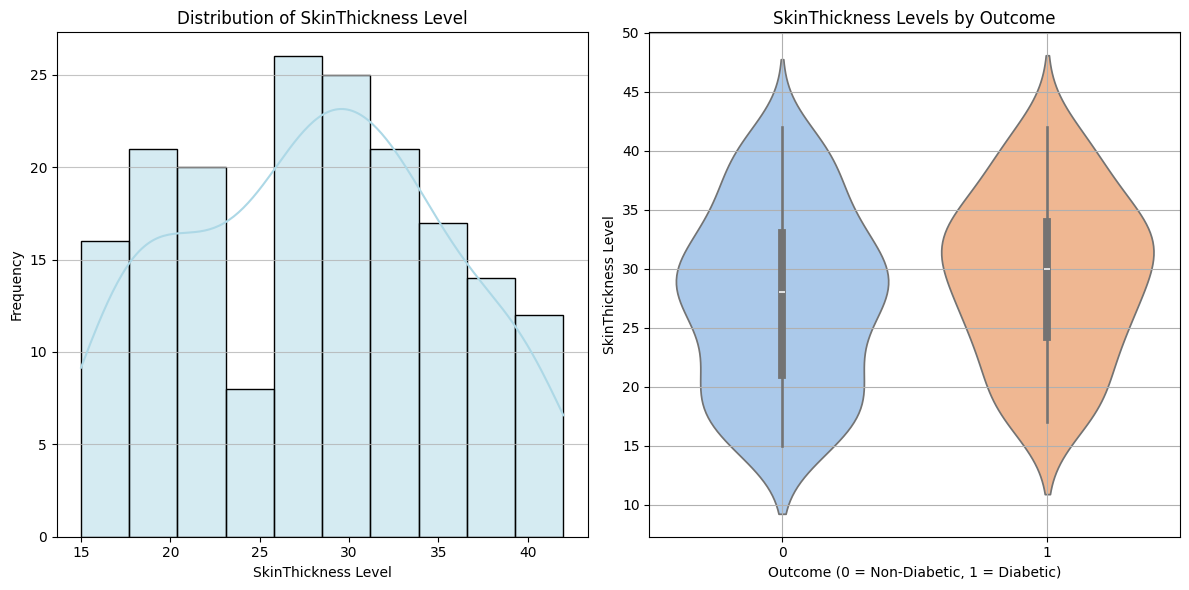

In [ ]:
# สร้าง Histogram สำหรับ Insulin
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)  # แบ่งหน้าจอเป็น 1 แถว 2 คอลัมน์
sns.histplot(df['SkinThickness'], bins=10, kde=True, color='lightblue')
plt.title('Distribution of SkinThickness Level')
plt.xlabel('SkinThickness Level')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Violin Plot สำหรับ Insulin กับ Outcome
plt.subplot(1, 2, 2)  # แบ่งหน้าจอเป็น 1 แถว 2 คอลัมน์
sns.violinplot(x='Outcome', y='SkinThickness', data=df, palette='pastel')
plt.title('SkinThickness Levels by Outcome')
plt.xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('SkinThickness Level')
plt.grid()

plt.tight_layout()  # ปรับระยะห่างระหว่างกราฟให้พอดี
plt.show()

### Insulin

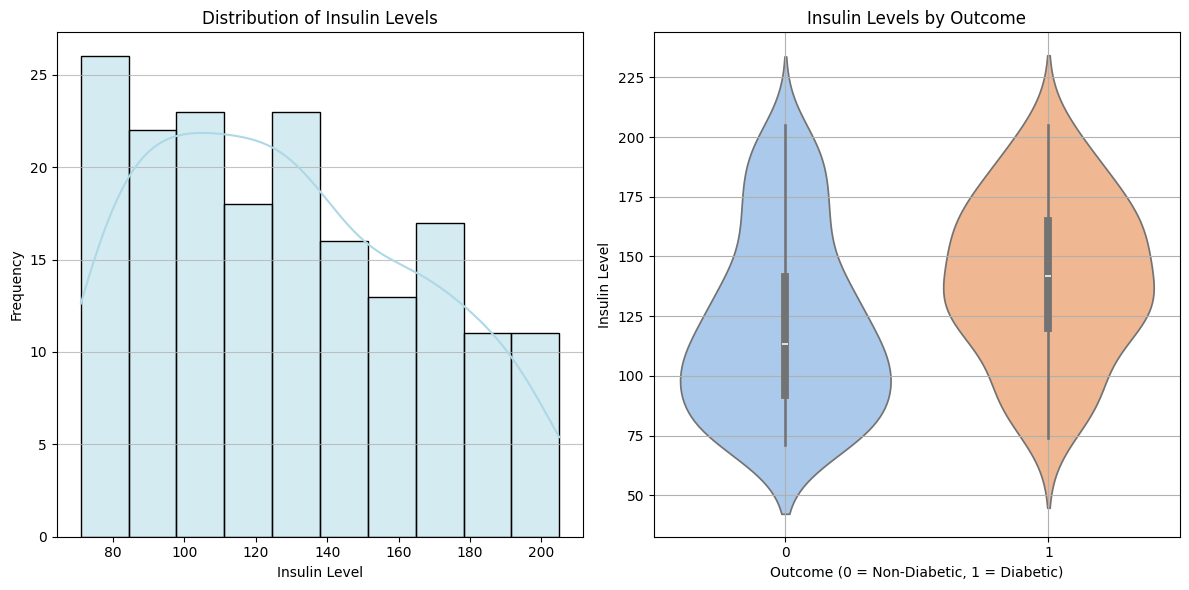

In [ ]:
# สร้าง Histogram สำหรับ Insulin
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)  # แบ่งหน้าจอเป็น 1 แถว 2 คอลัมน์
sns.histplot(df['Insulin'], bins=10, kde=True, color='lightblue')
plt.title('Distribution of Insulin Levels')
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Violin Plot สำหรับ Insulin กับ Outcome
plt.subplot(1, 2, 2)  # แบ่งหน้าจอเป็น 1 แถว 2 คอลัมน์
sns.violinplot(x='Outcome', y='Insulin', data=df, palette='pastel')
plt.title('Insulin Levels by Outcome')
plt.xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Insulin Level')
plt.grid()

plt.tight_layout()  # ปรับระยะห่างระหว่างกราฟให้พอดี
plt.show()

### BMI

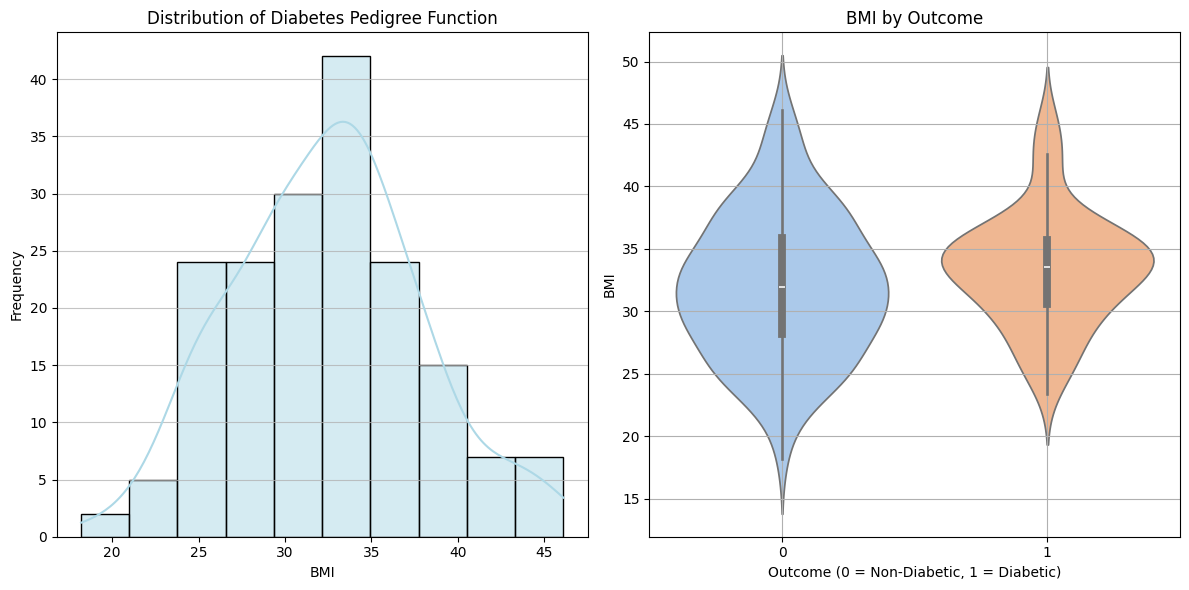

In [ ]:
# สร้าง Histogram สำหรับ DiabetesPedigreeFunction
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)  # แบ่งหน้าจอเป็น 1 แถว 2 คอลัมน์
sns.histplot(df['BMI'], bins=10, kde=True, color='lightblue')
plt.title('Distribution of Diabetes Pedigree Function')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Violin Plot สำหรับ DiabetesPedigreeFunction กับ Outcome
plt.subplot(1, 2, 2)  # แบ่งหน้าจอเป็น 1 แถว 2 คอลัมน์
sns.violinplot(x='Outcome', y='BMI', data=df, palette='pastel')
plt.title('BMI by Outcome')
plt.xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('BMI')
plt.grid()

plt.tight_layout()  # ปรับระยะห่างระหว่างกราฟให้พอดี
plt.show()

### DiabetesPedigreeFunctionn

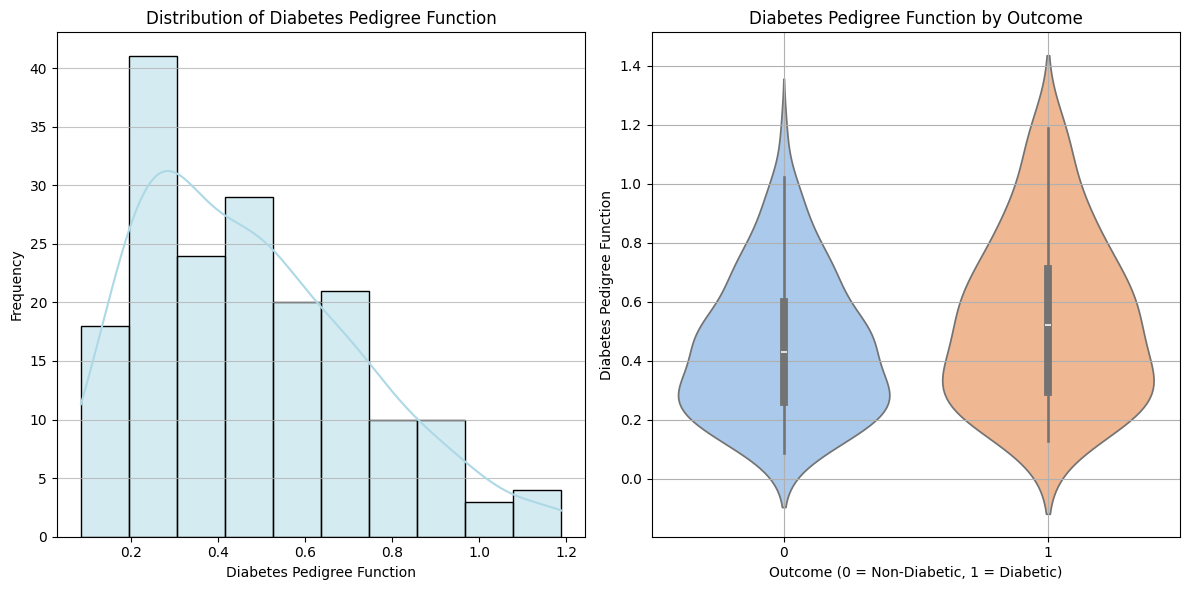

In [ ]:
# สร้าง Histogram สำหรับ DiabetesPedigreeFunction
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)  # แบ่งหน้าจอเป็น 1 แถว 2 คอลัมน์
sns.histplot(df['DiabetesPedigreeFunction'], bins=10, kde=True, color='lightblue')
plt.title('Distribution of Diabetes Pedigree Function')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Violin Plot สำหรับ DiabetesPedigreeFunction กับ Outcome
plt.subplot(1, 2, 2)  # แบ่งหน้าจอเป็น 1 แถว 2 คอลัมน์
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, palette='pastel')
plt.title('Diabetes Pedigree Function by Outcome')
plt.xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Diabetes Pedigree Function')
plt.grid()

plt.tight_layout()  # ปรับระยะห่างระหว่างกราฟให้พอดี
plt.show()

### Age

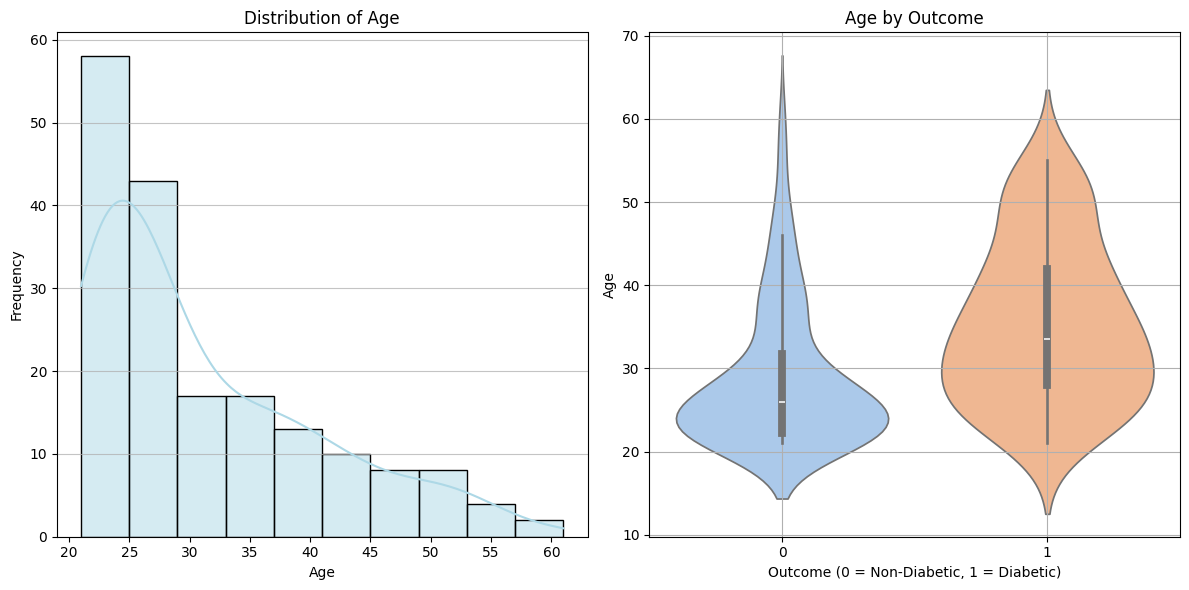

In [ ]:
# สร้าง Histogram สำหรับ Age
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)  # แบ่งหน้าจอเป็น 1 แถว 2 คอลัมน์
sns.histplot(df['Age'], bins=10, kde=True, color='lightblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Violin Plot สำหรับ Age กับ Outcome
plt.subplot(1, 2, 2)  # แบ่งหน้าจอเป็น 1 แถว 2 คอลัมน์
sns.violinplot(x='Outcome', y='Age', data=df, palette='pastel')
plt.title('Age by Outcome')
plt.xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Age')
plt.grid()

plt.tight_layout()  # ปรับระยะห่างระหว่างกราฟให้พอดี
plt.show()

### Correlation Matrix

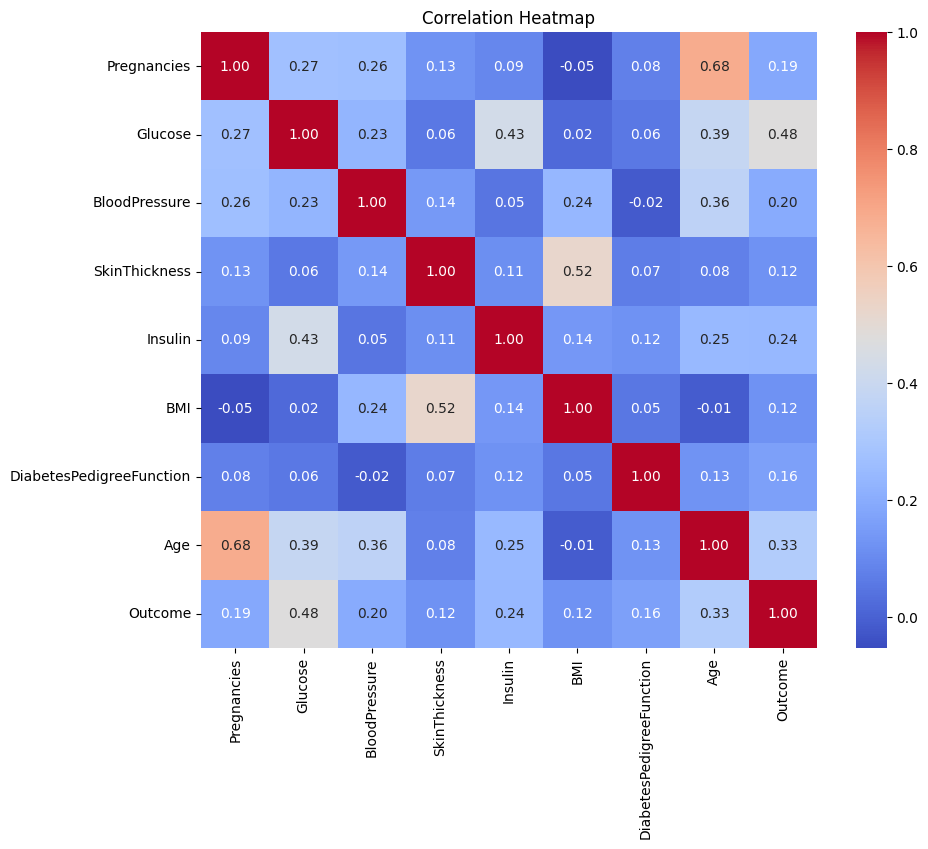

In [ ]:
# คำนวณ Correlation Matrix
correlation_matrix = df.corr()

# สร้าง Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

## **Summary project progress**

1) การทำความสะอาดข้อมูล ( Data Manipulate / Cleansing ) : มีการตรวจสอบข้อมูลที่มีการแสดงผลลัพท์ผิดปกติ ( Outlier ) และจัดการกับข้อมูลที่ขาดหายในชุดของข้อมูลที่มีการแสดงผลลัพท์เป็น 0 ( ยกเว้นคอลัมน์ Outcome ) โดยการแทนที่ด้วยค่ามัธยฐาน ( Median ) เพื่อป้องกันการส่งผลกระทบต่อโมเดล <br>

2) ผลการวิเคราะห์ ( Analysis Results ) : <br>

*   ค่าของ Insulin มีผลต่อความแม่นยำในการทำนาย โดยเฉพาะในกรณีที่มีการแทนค่าที่ขาดหายให้แสดงผลได้อย่างถูกต้อง
*   ค่าของ Glucose มีความสัมพันธ์เชิงบวกกับความเสี่ยงในการเกิดโรคเบาหวาน เนื่องจากมีผลการคำนวนค่าความสัมพันธ์ที่มีค่าสูงที่สุดในกลุ่มฟีเจอร์ต่างๆ
*   ค่าของ BMI และ อายุ ของผู้ป่วยเป็นปัจจัยที่สำคัญในการทำนายการเกิดโรคเบาหวาน โดยสามารถสังเกตุได้จากกราฟแสดงความสัมพันธ์ที่มีผลต่อการเป็นโรคเบาหวาน <br>

3) ข้อสรุปและประโยชน์ ( Conclusion and Benefits ) :

*   ข้อสรุป : ผลการวิเคราะห์แสดงให้เห็นว่า โมเดลที่สร้างสามารถทำนายความเสี่ยงในการเป็นโรคเบาหวานได้อย่างมีประสิทธิภาพ โดยมีตัวแปรสำคัญที่มีผลต่อการทำนายคือ น้ำตาลกลูโคส , BMI , และอายุ
*   ประโยชน์ของการวิเคราะห์ : โครงงานนี้สามารถนำไปต่อยอดและอาจใช้งานได้จริงในระบบสาธารณสุขเพื่อช่วยในการคัดกรองผู้ป่วยที่อาจมีความเสี่ยงในการเป็นโรคเบาหวาน ซึ่งนอกจากจะช่วยให้สามารถดำเนินการป้องกันและรักษาได้อย่างถูกต้องและทันการรักษาแล้ว ยังสามารถช่วยลดความเสี่ยงต่อการเกิดโรคในระยะยาวได้อีกด้วย

## **Data pre-processing**

In [ ]:
X = df.drop('Outcome', axis=1)  # คอลัมน์ Features
y = df['Outcome']               # คอลัมน์ Target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

column_transformer_scale = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']),
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

column_transformer_normalize = ColumnTransformer(
    transformers=[
        ('normalize', MinMaxScaler(), ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']),
    ],
    remainder='passthrough'  # Keep other columns unchanged
)


## **Build Machine Learning Model**

In [ ]:
### Logistic Regression
Logistic_pipeline = Pipeline([
    ('classifier', LogisticRegression())
])

Logistic_pipeline_Scaler = Pipeline([
    ('scaler', column_transformer_scale),
    ('classifier', LogisticRegression())
])

Logistic_pipeline_Normalize = Pipeline([
    ('normalize', column_transformer_normalize),
    ('classifier', LogisticRegression())
])


### GaussianNB
GaussianNB_pipeline = Pipeline([
    ('classifier', GaussianNB())
])
GaussianNB_pipeline_Scaler = Pipeline([
    ('scaler', column_transformer_scale),
    ('classifier', GaussianNB())
])
GaussianNB_pipeline_Normalize = Pipeline([
    ('normalize', column_transformer_normalize),
    ('classifier', GaussianNB())
])


### DecisionTreeClassifier
DT_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier())
])
DT_pipeline_Scaler = Pipeline([
    ('scaler', column_transformer_scale),
    ('classifier', DecisionTreeClassifier())
])
DT_pipeline_Normalize = Pipeline([
    ('normalize', column_transformer_normalize),
    ('classifier', DecisionTreeClassifier())
])


### Model name : Logistic Regression

In [ ]:
param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

grid_search_lr = GridSearchCV(Logistic_pipeline, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr_sc = GridSearchCV(Logistic_pipeline_Scaler, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr_nr = GridSearchCV(Logistic_pipeline_Normalize, param_grid_lr, cv=5, scoring='accuracy')
# Fit the pipeline and find the best model

grid_search_lr.fit(X_train, y_train)
grid_search_lr_sc.fit(X_train, y_train)
grid_search_lr_nr.fit(X_train, y_train)

# Get the best score
best_score_ = grid_search_lr.best_score_
best_score_sc = grid_search_lr_sc.best_score_
best_score_nr = grid_search_lr_nr.best_score_

# Print the best score
print("Best cross-validation accuracy for Logistic Regression:", best_score_)
print("Best cross-validation accuracy for Logistic Regression With Scaler:", best_score_sc)
print("Best cross-validation accuracy for Logistic Regression With Normalize:", best_score_nr)

# Evaluate on the test set
y_pred_lr = grid_search_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
y_pred_lr_sc = grid_search_lr_sc.predict(X_test)
accuracy_lr_sc = accuracy_score(y_test, y_pred_lr_sc)
y_pred_lr_nr = grid_search_lr_nr.predict(X_test)
accuracy_lr_nr = accuracy_score(y_test, y_pred_lr_nr)

print("Test set accuracy for Logistic Regression:", accuracy_lr)
print("Test set accuracy for Logistic Regression With Scaler:", accuracy_lr_sc)
print("Test set accuracy for Logistic Regression With Normalize:", accuracy_lr_nr)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best cross-validation accuracy for Logistic Regression: 0.7481481481481481
Best cross-validation accuracy for Logistic Regression With Scaler: 0.7555555555555555
Best cross-validation accuracy for Logistic Regression With Normalize: 0.7555555555555555
Test set accuracy for Logistic Regression: 0.7555555555555555
Test set accuracy for Logistic Regression With Scaler: 0.7777777777777778
Test set accuracy for Logistic Regression With Normalize: 0.7555555555555555


Confusion Matrix:
 [[28  5]
 [ 6  6]]

Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.82      0.85      0.84        33
      Cancer       0.55      0.50      0.52        12

    accuracy                           0.76        45
   macro avg       0.68      0.67      0.68        45
weighted avg       0.75      0.76      0.75        45



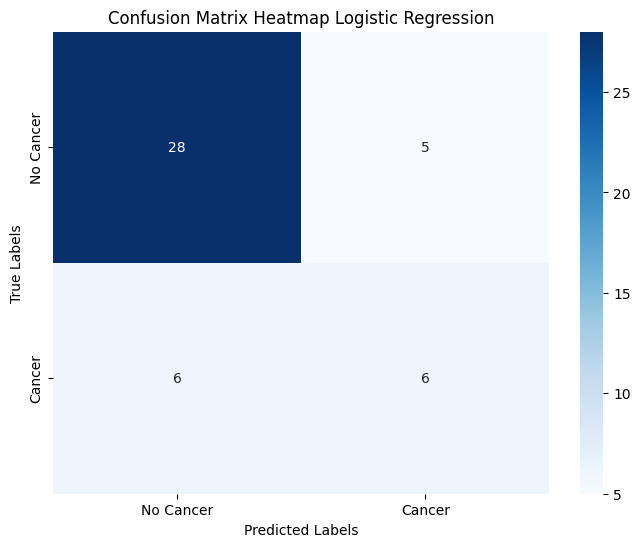

Confusion Matrix:
 [[29  4]
 [ 6  6]]

Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.83      0.88      0.85        33
      Cancer       0.60      0.50      0.55        12

    accuracy                           0.78        45
   macro avg       0.71      0.69      0.70        45
weighted avg       0.77      0.78      0.77        45



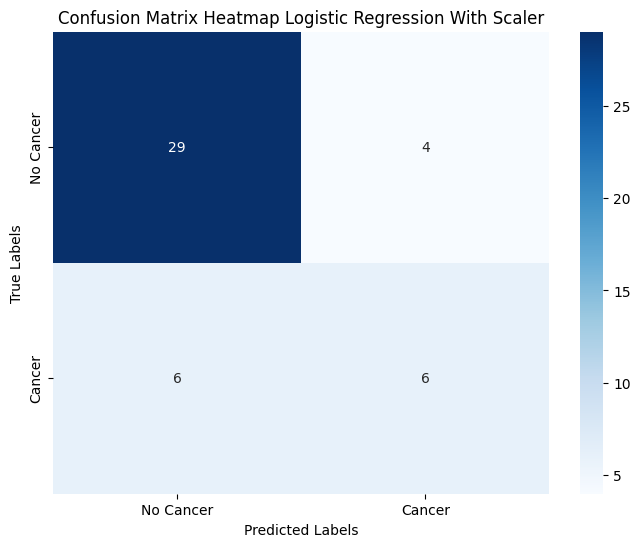

Confusion Matrix:
 [[28  5]
 [ 6  6]]

Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.82      0.85      0.84        33
      Cancer       0.55      0.50      0.52        12

    accuracy                           0.76        45
   macro avg       0.68      0.67      0.68        45
weighted avg       0.75      0.76      0.75        45



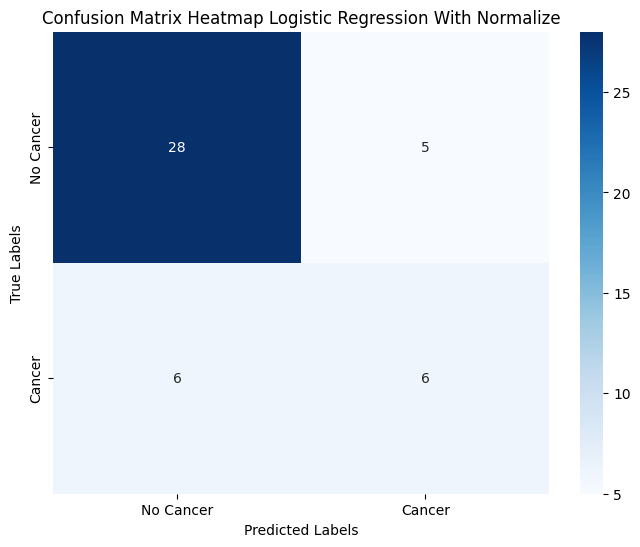

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred_lr)
report = classification_report(y_test, y_pred_lr, target_names=['No diabetes', 'diabetes'])

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No diabetes', 'diabetes'], yticklabels=['No diabetes', 'diabetes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap Logistic Regression')
plt.show()

######################################################


conf_matrix = confusion_matrix(y_test, y_pred_lr_sc)
report = classification_report(y_test, y_pred_lr_sc, target_names=['No diabetes', 'diabetes'])

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No diabetes', 'diabetes'], yticklabels=['No diabetes', 'diabetes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap Logistic Regression With Scaler')
plt.show()

###########################################################################################

conf_matrix = confusion_matrix(y_test, y_pred_lr_nr)
report = classification_report(y_test, y_pred_lr_nr, target_names=['No diabetes', 'diabetes'])

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No diabetes', 'diabetes'], yticklabels=['No diabetes', 'diabetes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap Logistic Regression With Normalize')
plt.show()

### Model name : GaussianDB Regression

In [ ]:
param_grid_nb = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Example values
}

grid_search_nb = GridSearchCV(GaussianNB_pipeline, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb_sc = GridSearchCV(GaussianNB_pipeline_Scaler, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb_nr = GridSearchCV(GaussianNB_pipeline_Normalize, param_grid_nb, cv=5, scoring='accuracy')

# Fit the pipelines and find the best models
grid_search_nb.fit(X_train, y_train)
grid_search_nb_sc.fit(X_train, y_train)
grid_search_nb_nr.fit(X_train, y_train)

# Get the best scores
best_score_nb = grid_search_nb.best_score_
best_score_nb_sc = grid_search_nb_sc.best_score_
best_score_nb_nr = grid_search_nb_nr.best_score_

# Print the best scores
print("Best cross-validation accuracy for GaussianNB:", best_score_nb)
print("Best cross-validation accuracy for GaussianNB With Scaler:", best_score_nb_sc)
print("Best cross-validation accuracy for GaussianNB With Normalize:", best_score_nb_nr)

# Evaluate on the test set
y_pred_nb = grid_search_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
y_pred_nb_sc = grid_search_nb_sc.predict(X_test)
accuracy_nb_sc = accuracy_score(y_test, y_pred_nb_sc)
y_pred_nb_nr = grid_search_nb_nr.predict(X_test)
accuracy_nb_nr = accuracy_score(y_test, y_pred_nb_nr)

print("Test set accuracy for GaussianNB:", accuracy_nb)
print("Test set accuracy for GaussianNB With Scaler:", accuracy_nb_sc)
print("Test set accuracy for GaussianNB With Normalize:", accuracy_nb_nr)

Best cross-validation accuracy for GaussianNB: 0.7407407407407407
Best cross-validation accuracy for GaussianNB With Scaler: 0.7407407407407407
Best cross-validation accuracy for GaussianNB With Normalize: 0.7407407407407407
Test set accuracy for GaussianNB: 0.7555555555555555
Test set accuracy for GaussianNB With Scaler: 0.7555555555555555
Test set accuracy for GaussianNB With Normalize: 0.7555555555555555


Confusion Matrix:
 [[28  5]
 [ 6  6]]

Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.82      0.85      0.84        33
      Cancer       0.55      0.50      0.52        12

    accuracy                           0.76        45
   macro avg       0.68      0.67      0.68        45
weighted avg       0.75      0.76      0.75        45



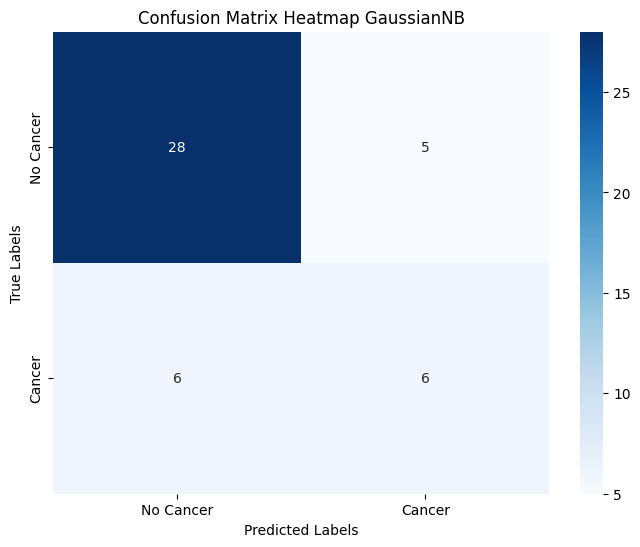

Confusion Matrix:
 [[28  5]
 [ 6  6]]

Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.82      0.85      0.84        33
      Cancer       0.55      0.50      0.52        12

    accuracy                           0.76        45
   macro avg       0.68      0.67      0.68        45
weighted avg       0.75      0.76      0.75        45



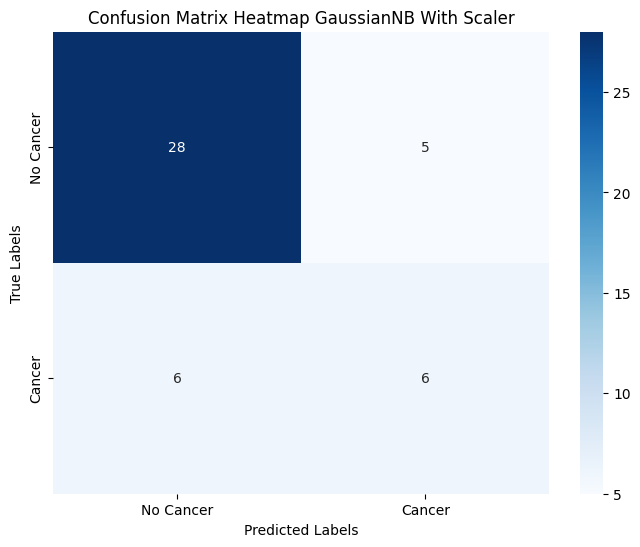

Confusion Matrix:
 [[28  5]
 [ 6  6]]

Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.82      0.85      0.84        33
      Cancer       0.55      0.50      0.52        12

    accuracy                           0.76        45
   macro avg       0.68      0.67      0.68        45
weighted avg       0.75      0.76      0.75        45



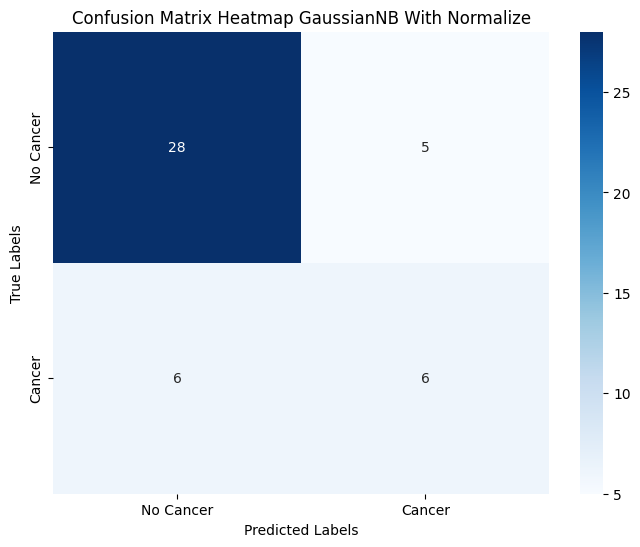

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred_nb)
report = classification_report(y_test, y_pred_nb, target_names=['No diabetes', 'diabetes'])

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No diabetes', 'diabetes'], yticklabels=['No diabetes', 'diabetes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap GaussianNB')
plt.show()

######################################################


conf_matrix = confusion_matrix(y_test, y_pred_nb_sc)
report = classification_report(y_test, y_pred_nb_sc, target_names=['No diabetes', 'diabetes'])

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No diabetes', 'diabetes'], yticklabels=['No diabetes', 'diabetes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap GaussianNB With Scaler')
plt.show()

###########################################################################################

conf_matrix = confusion_matrix(y_test, y_pred_nb_nr)
report = classification_report(y_test, y_pred_nb_nr, target_names=['No diabetes', 'diabetes'])

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No diabetes', 'diabetes'], yticklabels=['No diabetes', 'diabetes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap GaussianNB With Normalize')
plt.show()

### Model name : DecisionTree

In [ ]:
param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DT_pipeline, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt_sc = GridSearchCV(DT_pipeline_Scaler, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt_nr = GridSearchCV(DT_pipeline_Normalize, param_grid_dt, cv=5, scoring='accuracy')

# Fit the pipelines and find the best models
grid_search_dt.fit(X_train, y_train)
grid_search_dt_sc.fit(X_train, y_train)
grid_search_dt_nr.fit(X_train, y_train)

# Get the best scores
best_score_dt = grid_search_dt.best_score_
best_score_dt_sc = grid_search_dt_sc.best_score_
best_score_dt_nr = grid_search_dt_nr.best_score_

# Print the best scores
print("Best cross-validation accuracy for Decision Tree:", best_score_dt)
print("Best cross-validation accuracy for Decision Tree With Scaler:", best_score_dt_sc)
print("Best cross-validation accuracy for Decision Tree With Normalize:", best_score_dt_nr)

# Evaluate on the test set
y_pred_dt = grid_search_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
y_pred_dt_sc = grid_search_dt_sc.predict(X_test)
accuracy_dt_sc = accuracy_score(y_test, y_pred_dt_sc)
y_pred_dt_nr = grid_search_dt_nr.predict(X_test)
accuracy_dt_nr = accuracy_score(y_test, y_pred_dt_nr)

print("Test set accuracy for Decision Tree:", accuracy_dt)
print("Test set accuracy for Decision Tree With Scaler:", accuracy_dt_sc)
print("Test set accuracy for Decision Tree With Normalize:", accuracy_dt_nr)

Best cross-validation accuracy for Decision Tree: 0.7185185185185186
Best cross-validation accuracy for Decision Tree With Scaler: 0.7185185185185184
Best cross-validation accuracy for Decision Tree With Normalize: 0.711111111111111
Test set accuracy for Decision Tree: 0.7111111111111111
Test set accuracy for Decision Tree With Scaler: 0.7333333333333333
Test set accuracy for Decision Tree With Normalize: 0.7111111111111111


Confusion Matrix:
 [[25  8]
 [ 5  7]]

Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.83      0.76      0.79        33
      Cancer       0.47      0.58      0.52        12

    accuracy                           0.71        45
   macro avg       0.65      0.67      0.66        45
weighted avg       0.74      0.71      0.72        45



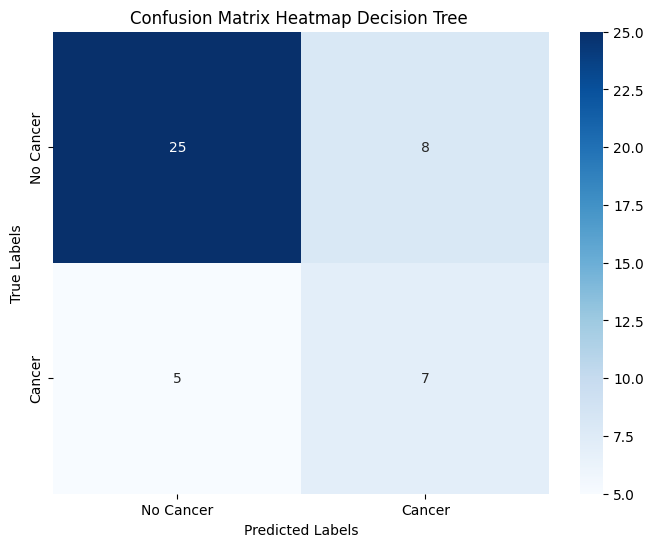

Confusion Matrix:
 [[26  7]
 [ 5  7]]

Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.84      0.79      0.81        33
      Cancer       0.50      0.58      0.54        12

    accuracy                           0.73        45
   macro avg       0.67      0.69      0.68        45
weighted avg       0.75      0.73      0.74        45



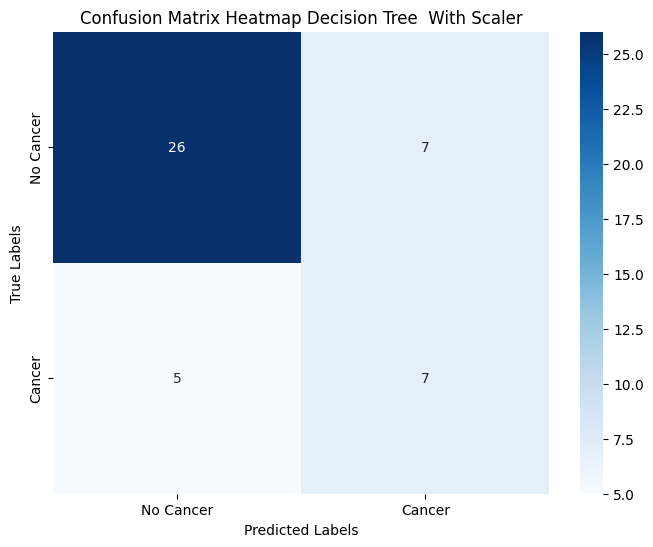

Confusion Matrix:
 [[25  8]
 [ 5  7]]

Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.83      0.76      0.79        33
      Cancer       0.47      0.58      0.52        12

    accuracy                           0.71        45
   macro avg       0.65      0.67      0.66        45
weighted avg       0.74      0.71      0.72        45



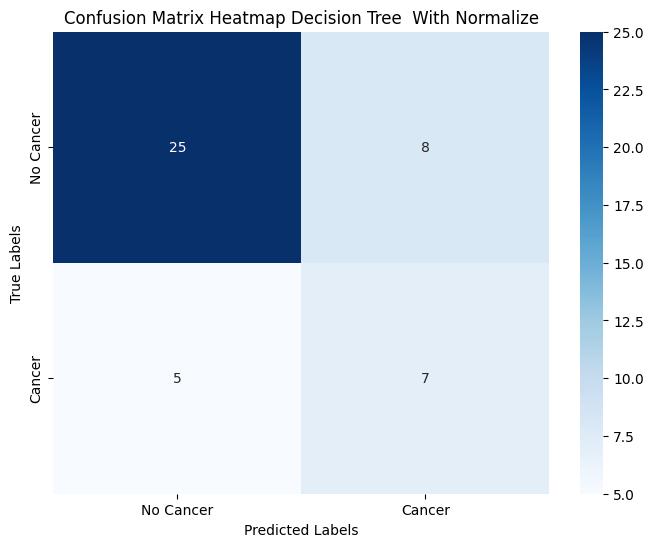

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred_dt)
report = classification_report(y_test, y_pred_dt, target_names=['No diabetes', 'diabetes'])

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No diabetes', 'diabetes'], yticklabels=['No diabetes', 'diabetes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap Decision Tree ')
plt.show()

######################################################


conf_matrix = confusion_matrix(y_test, y_pred_dt_sc)
report = classification_report(y_test, y_pred_dt_sc, target_names=['No diabetes', 'diabetes'])

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No diabetes', 'diabetes'], yticklabels=['No diabetes', 'diabetes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap Decision Tree  With Scaler')
plt.show()

###########################################################################################

conf_matrix = confusion_matrix(y_test, y_pred_dt_nr)
report = classification_report(y_test, y_pred_dt_nr, target_names=['No diabetes', 'diabetes'])

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No diabetes', 'diabetes'], yticklabels=['No diabetes', 'diabetes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap Decision Tree  With Normalize')
plt.show()

### Model name : KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


KNN_pipeline = Pipeline([
    ('classifier', KNeighborsClassifier())
])

KNN_pipeline_Scaler = Pipeline([
    ('scaler', column_transformer_scale),
    ('classifier', KNeighborsClassifier())
])

KNN_pipeline_Normalize = Pipeline([
    ('normalize', column_transformer_normalize),
    ('classifier', KNeighborsClassifier())
])

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],  # Explore different values for k
    'classifier__weights': ['uniform', 'distance'],  # Weighting schemes
    'classifier__metric': ['euclidean', 'manhattan']  # Distance metrics
}

grid_search_knn = GridSearchCV(KNN_pipeline, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn_sc = GridSearchCV(KNN_pipeline_Scaler, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn_nr = GridSearchCV(KNN_pipeline_Normalize, param_grid_knn, cv=5, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)
grid_search_knn_sc.fit(X_train, y_train)
grid_search_knn_nr.fit(X_train, y_train)

# Get and print best scores
best_score_knn = grid_search_knn.best_score_
best_score_knn_sc = grid_search_knn_sc.best_score_
best_score_knn_nr = grid_search_knn_nr.best_score_

print("Best cross-validation accuracy for KNN:", best_score_knn)
print("Best cross-validation accuracy for KNN With Scaler:", best_score_knn_sc)
print("Best cross-validation accuracy for KNN With Normalize:", best_score_knn_nr)

# Evaluate on the test set
y_pred_knn = grid_search_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
y_pred_knn_sc = grid_search_knn_sc.predict(X_test)
accuracy_knn_sc = accuracy_score(y_test, y_pred_knn_sc)
y_pred_knn_nr = grid_search_knn_nr.predict(X_test)
accuracy_knn_nr = accuracy_score(y_test, y_pred_knn_nr)

print("Test set accuracy for KNN:", accuracy_knn)
print("Test set accuracy for KNN with Scaler:", accuracy_knn_sc)
print("Test set accuracy for KNN with Normalize:", accuracy_knn_nr)


Best cross-validation accuracy for KNN: 0.7555555555555554
Best cross-validation accuracy for KNN With Scaler: 0.7111111111111111
Best cross-validation accuracy for KNN With Normalize: 0.725925925925926
Test set accuracy for KNN: 0.7111111111111111
Test set accuracy for KNN with Scaler: 0.8
Test set accuracy for KNN with Normalize: 0.8


Confusion Matrix:
 [[27  6]
 [ 7  5]]

Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.79      0.82      0.81        33
      Cancer       0.45      0.42      0.43        12

    accuracy                           0.71        45
   macro avg       0.62      0.62      0.62        45
weighted avg       0.70      0.71      0.71        45



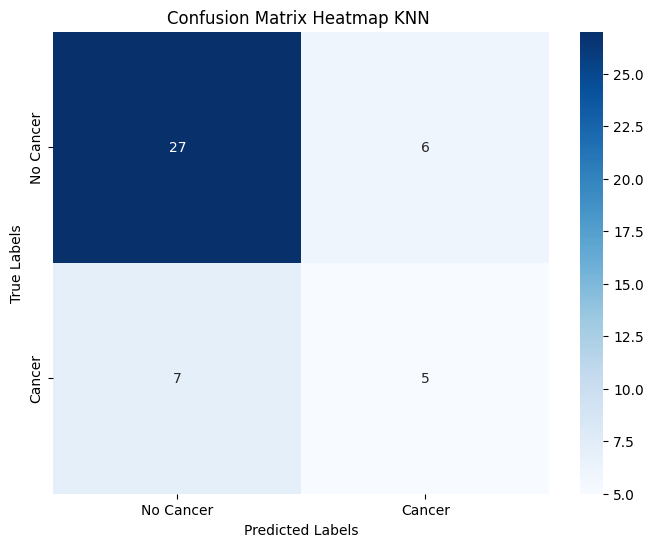

Confusion Matrix:
 [[30  3]
 [ 6  6]]

Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.83      0.91      0.87        33
      Cancer       0.67      0.50      0.57        12

    accuracy                           0.80        45
   macro avg       0.75      0.70      0.72        45
weighted avg       0.79      0.80      0.79        45



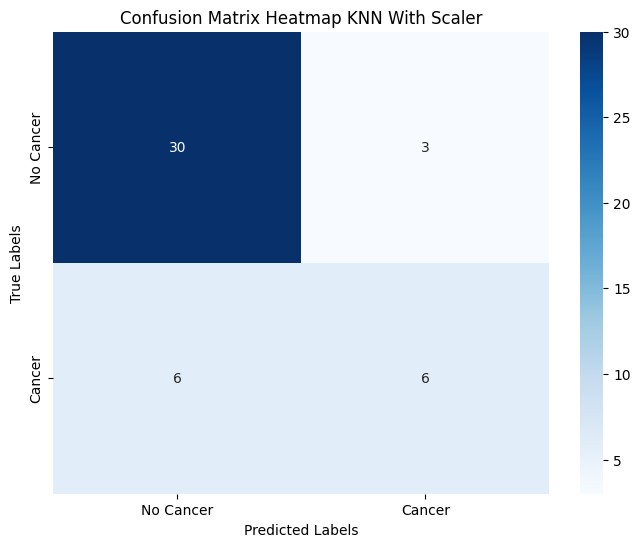

Confusion Matrix:
 [[30  3]
 [ 6  6]]

Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.83      0.91      0.87        33
      Cancer       0.67      0.50      0.57        12

    accuracy                           0.80        45
   macro avg       0.75      0.70      0.72        45
weighted avg       0.79      0.80      0.79        45



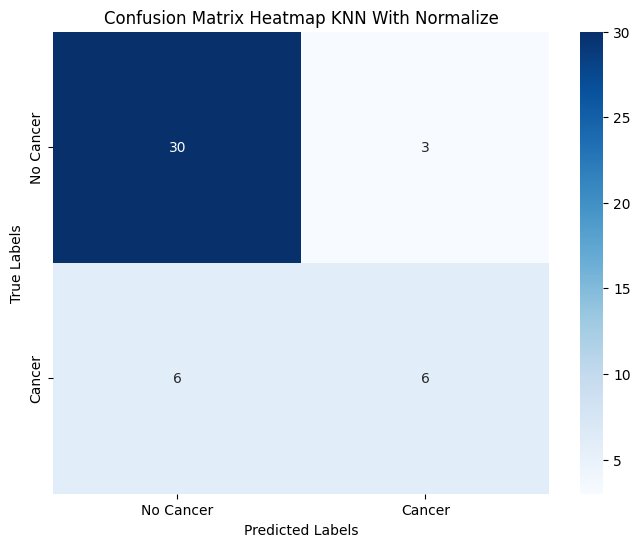

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn, target_names=['No diabetes', 'diabetes'])

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No diabetes', 'diabetes'], yticklabels=['No diabetes', 'diabetes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap KNN ')
plt.show()

######################################################


conf_matrix = confusion_matrix(y_test, y_pred_knn_sc)
report = classification_report(y_test, y_pred_knn_sc, target_names=['No diabetes', 'diabetes'])

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No diabetes', 'diabetes'], yticklabels=['No diabetes', 'diabetes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap KNN With Scaler')
plt.show()

###########################################################################################

conf_matrix = confusion_matrix(y_test, y_pred_knn_nr)
report = classification_report(y_test, y_pred_knn_nr, target_names=['No diabetes', 'diabetes'])

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No diabetes', 'diabetes'], yticklabels=['No diabetes', 'diabetes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap KNN With Normalize')
plt.show()

**Evaluate Model**

* จากการทดลองทำนาย Classification Model จาก 3 Model ได้แก่ Logistic Regression GaussianNB และ DecisionTree พบว่า ..

" ผลการทำนายนั้นมี F1-Score ที่ไม่ได้ห่างกันมากอย่างมีนัยยะสำคัญ รวมถึงการ Normalize และ Scaler ก็มีการพัฒนาผลขึ้นจากเดิมเพียงเล็กน้อย หากข้อมูลใหญ่กว่านี้อาจจะสังเกตพฤตกิกรรมของโมเดลได้ชัดขึ้นมากกว่านี้ "

* precision ใน true ต่ำคาดว่าเกิดจาก Imbalanced Dataset

## **Summary**

1) สรุปการทำงานของโมเดล :

> Accuracy : โมเดลมีการใช้ Scaler ที่มีความแม่นยำค่อนข้างสูงกว่าแบบปกติ และ With Normalize
   .. ซึ่งอาจแสดงว่า Standard Scaling มีผลช่วยให้โมเดลแยกแยะข้อมูลได้ดีขึ้นเล็กน้อย
> Precision และ Recall สำหรับ " Cancer " :
   - การใช้ Scaler มี Precision และ Recall ที่ดีกว่าเล็กน้อยเมื่อเทียบกับแบบปกติและ With Normalize
   - Recall ของ " Cancer " ในทุกกรณียังคงต่ำ ซึ่งหมายความว่าโมเดลยังพลาดการตรวจจับ "Cancer" อยู่ในบางกรณี
> ความสมดุลระหว่าง Precision และ Recall :
  - ค่า F1-Score สำหรับ " Cancer " ชี้ให้เห็นว่าโมเดลยังมีปัญหาในการแยกแยะตัวอย่างของคลาสที่ไม่สมดุล (Cancer มีจำนวนตัวอย่างน้อยกว่า)
> ผลกระทบของ Preprocessing :
  - การใช้ Scaler ช่วยเพิ่ม Accuracy และ Precision ของคลาส " Cancer " เล็กน้อย ซึ่งสอดคล้องกับธรรมชาติของ ความไวต่อการกระจายตัวของข้อมูล
   - การ Normalize อาจไม่ช่วยเพิ่มประสิทธิภาพในบางกรณี


2) สรุปการแก้ปัญหาที่ได้ตั้งไว้ :

> ข้อสรุป : ผลการวิเคราะห์แสดงให้เห็นว่า โมเดลที่สร้างสามารถทำนายความเสี่ยงในการเป็นโรคเบาหวานได้อย่างมีประสิทธิภาพ
   .. โดยมีตัวแปรสำคัญที่มีผลต่อการทำนายคือ น้ำตาลกลูโคส , BMI , และอายุ
> ประโยชน์ของการวิเคราะห์ : โครงงานนี้สามารถนำไปต่อยอดและอาจใช้งานได้จริงในระบบสาธารณสุขเพื่อช่วยในการคัดกรองผู้ป่วยที่อาจมีความเสี่ยงในการเป็นโรคเบาหวาน ซึ่งนอกจากจะช่วยให้สามารถดำเนินการป้องกันและรักษาได้อย่างถูกต้องและทันการรักษาแล้ว ยังสามารถช่วยลดความเสี่ยงต่อการเกิดโรคในระยะยาวได้อีกด้วย

